<a href="https://colab.research.google.com/github/Sadnya20/Stockprediction-BI/blob/main/vaccination.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem:- To find whether the person is vaccinated or not.

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
df=pd.read_csv("h1n1_vaccine_prediction.csv")

In [ ]:
df.shape

(26707, 34)

In [ ]:
df.head(5)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [ ]:
df.tail(5)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,White,Female,NaN,Not Married,Own,NaN,"MSA, Not Principle City",0.0,0.0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0,0
26706,26706,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,"MSA, Principle City",1.0,0.0,0


In [ ]:
df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [ ]:
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

<Axes: xlabel='h1n1_vaccine', ylabel='count'>

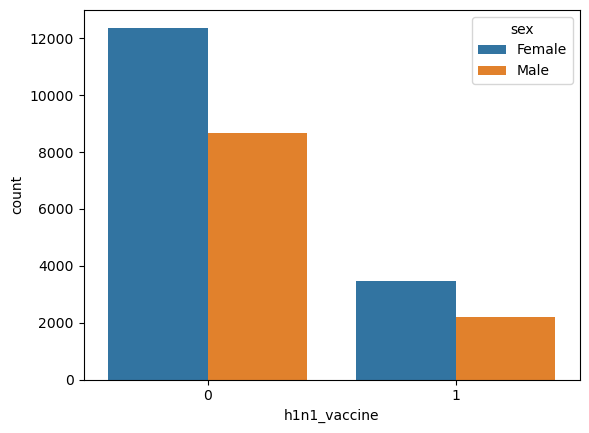

In [ ]:
sns.countplot(x="h1n1_vaccine",hue="sex",data=df)

In [ ]:
df["h1n1_vaccine"].value_counts()

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

<Axes: xlabel='h1n1_vaccine', ylabel='count'>

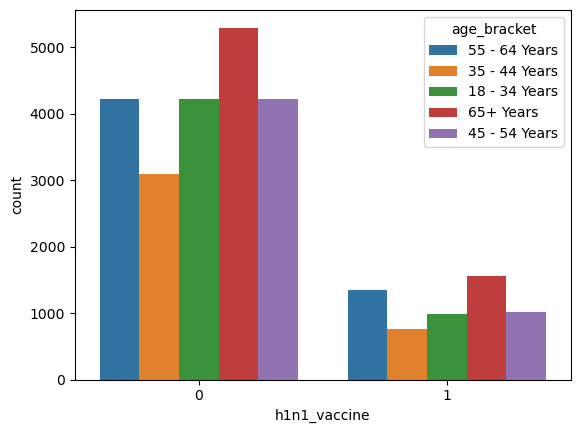

In [ ]:
sns.countplot(x="h1n1_vaccine",hue="age_bracket",data=df)

In [ ]:
pd.crosstab(df["h1n1_vaccine"],["sex"])

col_0,sex
h1n1_vaccine,
0,21033
1,5674


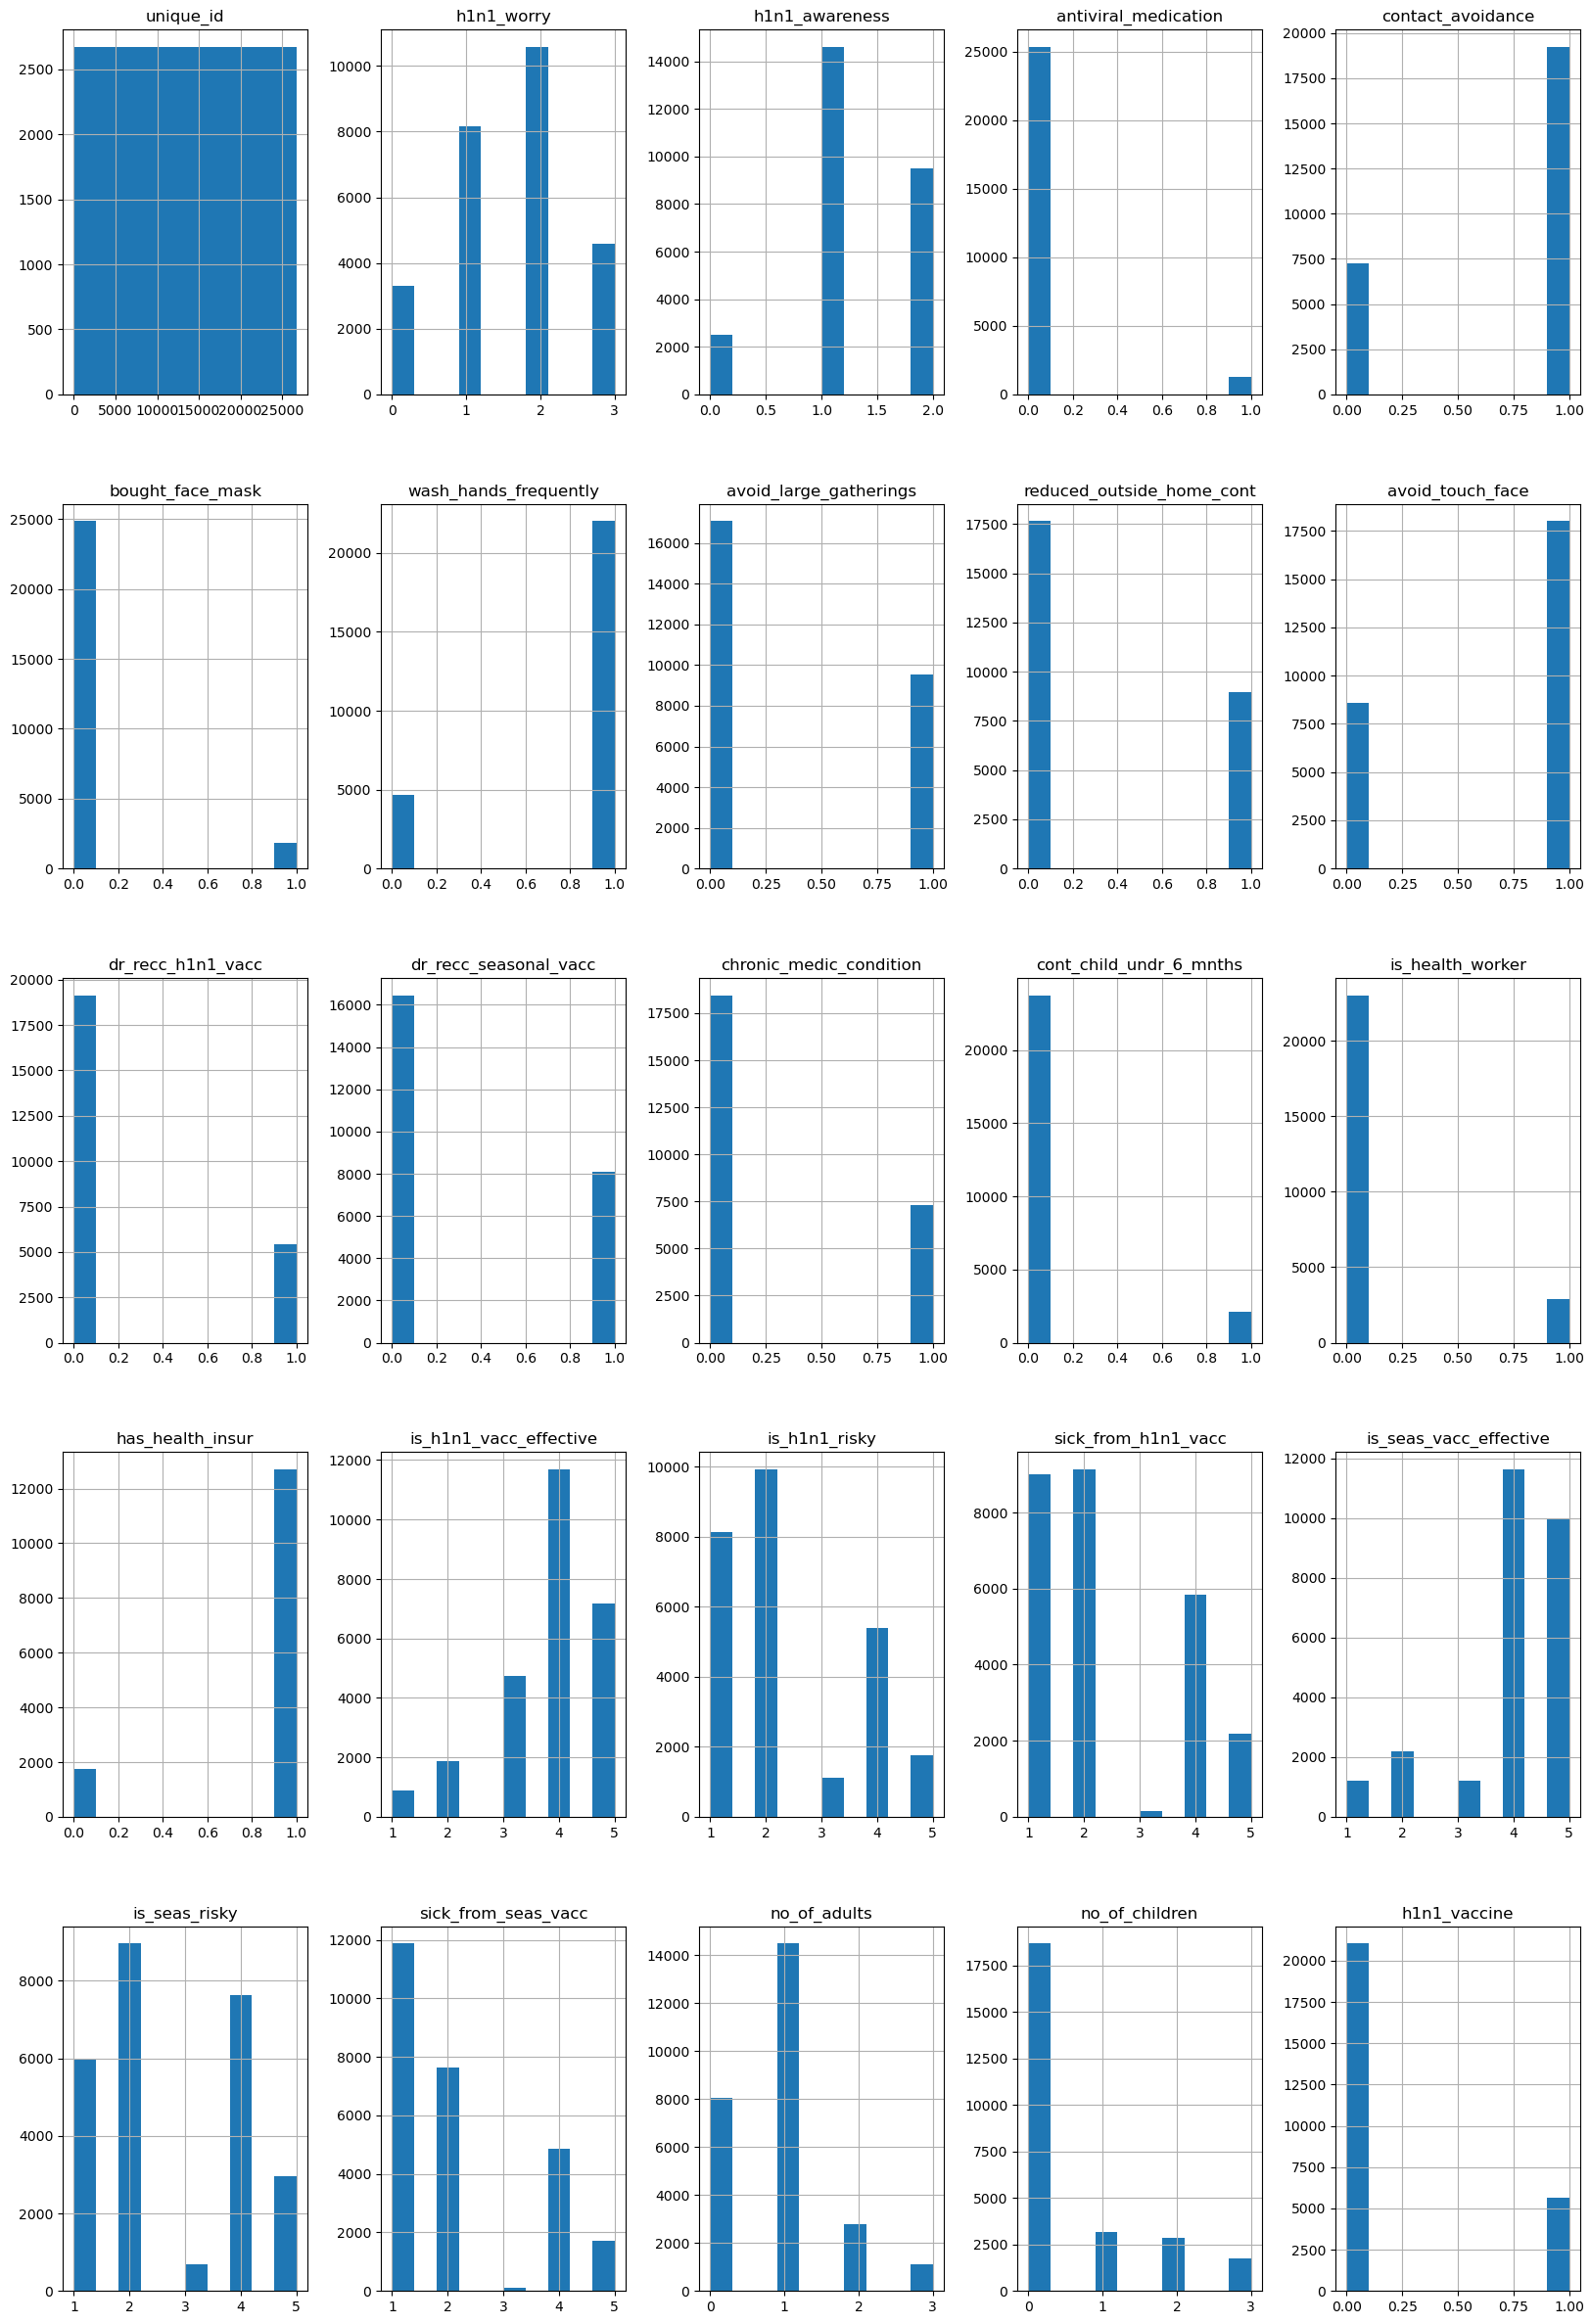

In [ ]:
df.hist(figsize=(20,30))
plt.show()

<Axes: xlabel='race', ylabel='count'>

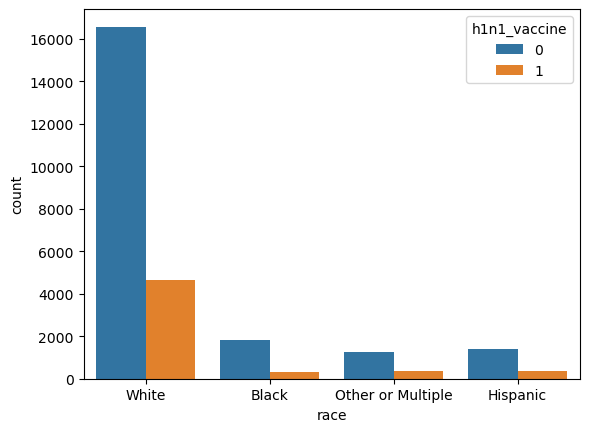

In [ ]:
sns.countplot(x="race",hue="h1n1_vaccine",data=df)

<Axes: >

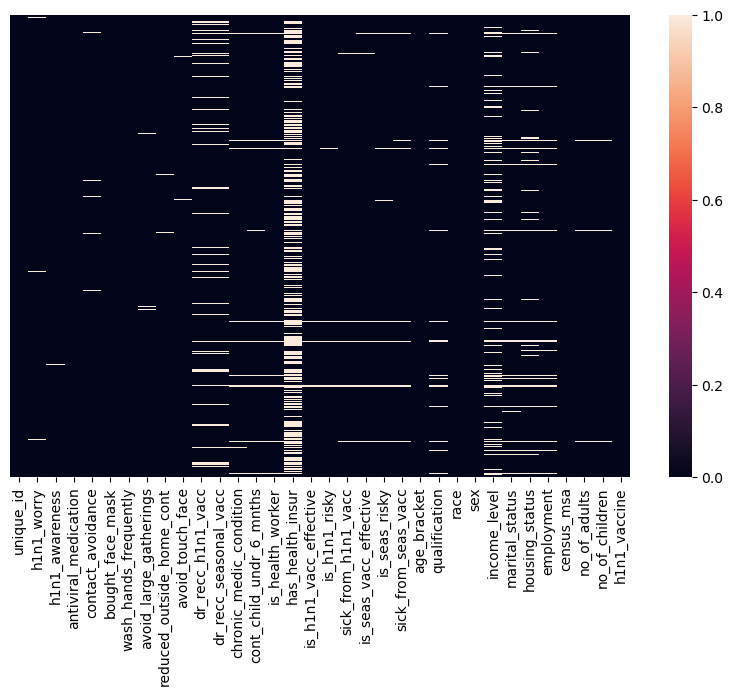

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),yticklabels=False)

In [ ]:
df=df.drop(["unique_id","dr_recc_h1n1_vacc","dr_recc_seasonal_vacc","has_health_insur","qualification","income_level","marital_status","is_health_worker","housing_status","employment"],axis=1)

## dropped all those columns having missing values more than 1000

In [ ]:
df=pd.get_dummies(df,columns=["age_bracket","race","sex","census_msa"])

In [ ]:
df.dtypes

h1n1_worry                             float64
h1n1_awareness                         float64
antiviral_medication                   float64
contact_avoidance                      float64
bought_face_mask                       float64
wash_hands_frequently                  float64
avoid_large_gatherings                 float64
reduced_outside_home_cont              float64
avoid_touch_face                       float64
chronic_medic_condition                float64
cont_child_undr_6_mnths                float64
is_h1n1_vacc_effective                 float64
is_h1n1_risky                          float64
sick_from_h1n1_vacc                    float64
is_seas_vacc_effective                 float64
is_seas_risky                          float64
sick_from_seas_vacc                    float64
no_of_adults                           float64
no_of_children                         float64
h1n1_vaccine                             int64
age_bracket_18 - 34 Years                uint8
age_bracket_3

In [ ]:
df.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,chronic_medic_condition,...,age_bracket_65+ Years,race_Black,race_Hispanic,race_Other or Multiple,race_White,sex_Female,sex_Male,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0,0,0,0,1,1,0,0,0,1
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0,0,0,0,1,0,1,1,0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,1,0,1,1,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1,0,0,0,1,1,0,0,1,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0,0,0,0,1,1,0,1,0,0


In [ ]:
df.isnull().sum()

h1n1_worry                              92
h1n1_awareness                         116
antiviral_medication                    71
contact_avoidance                      208
bought_face_mask                        19
wash_hands_frequently                   42
avoid_large_gatherings                  87
reduced_outside_home_cont               82
avoid_touch_face                       128
chronic_medic_condition                971
cont_child_undr_6_mnths                820
is_h1n1_vacc_effective                 391
is_h1n1_risky                          388
sick_from_h1n1_vacc                    395
is_seas_vacc_effective                 462
is_seas_risky                          514
sick_from_seas_vacc                    537
no_of_adults                           249
no_of_children                         249
h1n1_vaccine                             0
age_bracket_18 - 34 Years                0
age_bracket_35 - 44 Years                0
age_bracket_45 - 54 Years                0
age_bracket

In [ ]:
median1=df["h1n1_worry"].median()
df["h1n1_worry"]=df["h1n1_worry"].fillna(median1)
median2=df["h1n1_awareness"].median()
df["h1n1_awareness"]=df["h1n1_awareness"].fillna(median2)
median3=df["antiviral_medication"].median()
df["antiviral_medication"]=df["antiviral_medication"].fillna(median3)
median4=df["contact_avoidance"].median()
df["contact_avoidance"]=df["contact_avoidance"].fillna(median4)
median5=df["bought_face_mask"].median()
df["bought_face_mask"]=df["bought_face_mask"].fillna(median5)
median6=df["wash_hands_frequently"].median()
df["wash_hands_frequently"]=df["wash_hands_frequently"].fillna(median6)
median7=df["avoid_large_gatherings"].median()
df["avoid_large_gatherings"]=df["avoid_large_gatherings"].fillna(median7)
median8=df["reduced_outside_home_cont"].median()
df["reduced_outside_home_cont"]=df["reduced_outside_home_cont"].fillna(median8)
median9=df["avoid_touch_face"].median()
df["avoid_touch_face"]=df["avoid_touch_face"].fillna(median9)
median10=df["chronic_medic_condition"].median()
df["chronic_medic_condition"]=df["chronic_medic_condition"].fillna(median10)
median11=df["cont_child_undr_6_mnths"].median()
df["cont_child_undr_6_mnths"]=df["cont_child_undr_6_mnths"].fillna(median11)
median12=df["is_h1n1_vacc_effective"].median()
df["is_h1n1_vacc_effective"]=df["is_h1n1_vacc_effective"].fillna(median12)
median13=df["is_h1n1_risky"].median()
df["is_h1n1_risky"]=df["is_h1n1_risky"].fillna(median13)
median14=df["sick_from_h1n1_vacc"].median()
df["sick_from_h1n1_vacc"]=df["sick_from_h1n1_vacc"].fillna(median14)
median15=df["is_seas_vacc_effective"].median()
df["is_seas_vacc_effective"]=df["is_seas_vacc_effective"].fillna(median15)
median16=df["is_seas_risky"].median()
df["is_seas_risky"]=df["is_seas_risky"].fillna(median16)
median17=df["sick_from_seas_vacc"].median()
df["sick_from_seas_vacc"]=df["sick_from_seas_vacc"].fillna(median17)
median18=df["no_of_adults"].median()
df["no_of_adults"]=df["no_of_adults"].fillna(median18)
median19=df["no_of_children"].median()
df["no_of_children"]=df["no_of_children"].fillna(median19)

In [ ]:
df.isnull().sum()

h1n1_worry                             0
h1n1_awareness                         0
antiviral_medication                   0
contact_avoidance                      0
bought_face_mask                       0
wash_hands_frequently                  0
avoid_large_gatherings                 0
reduced_outside_home_cont              0
avoid_touch_face                       0
chronic_medic_condition                0
cont_child_undr_6_mnths                0
is_h1n1_vacc_effective                 0
is_h1n1_risky                          0
sick_from_h1n1_vacc                    0
is_seas_vacc_effective                 0
is_seas_risky                          0
sick_from_seas_vacc                    0
no_of_adults                           0
no_of_children                         0
h1n1_vaccine                           0
age_bracket_18 - 34 Years              0
age_bracket_35 - 44 Years              0
age_bracket_45 - 54 Years              0
age_bracket_55 - 64 Years              0
age_bracket_65+ 

<Axes: xlabel='h1n1_vaccine', ylabel='count'>

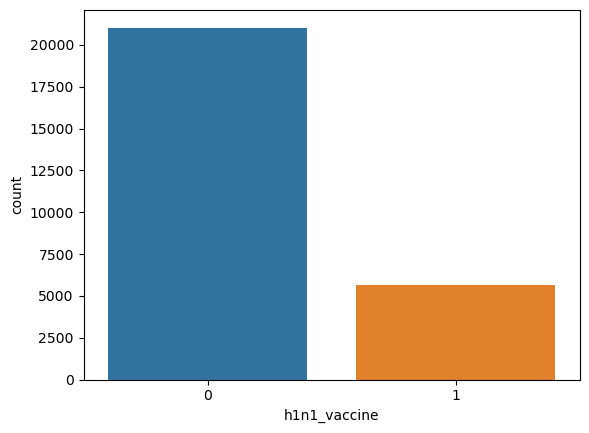

In [ ]:
sns.countplot(x="h1n1_vaccine",data=df)

<Axes: >

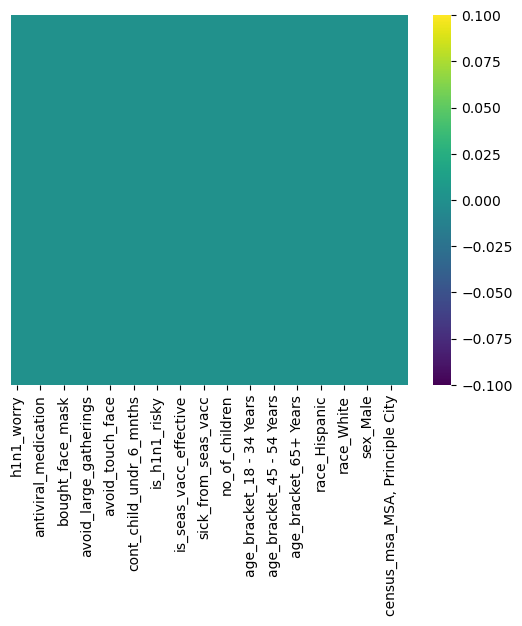

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")

In [ ]:
X = df.drop(["h1n1_vaccine"],axis=1)
y=df[['h1n1_vaccine']]

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
model=LogisticRegression(solver="lbfgs")
model.fit(X_train,y_train)
model

LogisticRegression()

In [ ]:
model.score(X_train,y_train)

0.8129346314325452

In [ ]:
model.score(X_test,y_test)

0.8096842630725072

In [ ]:
predictions=model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.8096842630725072

In [ ]:
from sklearn import metrics

In [ ]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      6319
           1       0.61      0.28      0.38      1694

    accuracy                           0.81      8013
   macro avg       0.72      0.61      0.63      8013
weighted avg       0.78      0.81      0.78      8013



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[6021,  298],
       [1227,  467]], dtype=int64)

<Axes: >

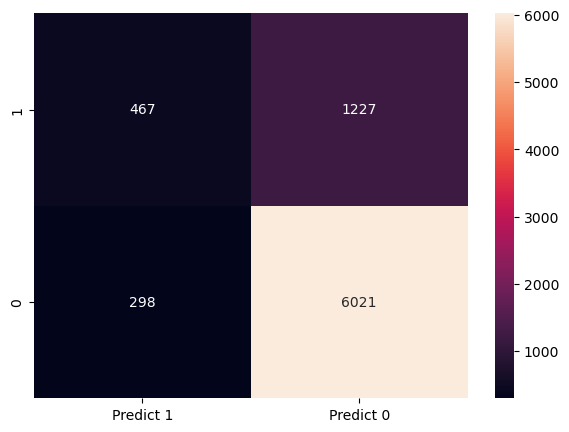

In [ ]:
cm=metrics.confusion_matrix(y_test,predictions,labels=[1,0])
df_cm=pd.DataFrame(cm,index=[i for i in["1","0"]],
                  columns=[i for i in["Predict 1","Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot=True,fmt='g')

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model2=DecisionTreeClassifier(max_depth=3,criterion="gini")

In [ ]:
model2.fit(X_train,y_train)

In [ ]:
model2.score(X_train,y_train)

In [ ]:
model2.score(X_test,y_test)

0.8069387245725695